# Predict layout of simulated chess board

In [1]:
import fnmatch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.utils.data

import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_Weights
import torchvision.transforms.functional as Tf

from pydrake.perception import PointCloud

from board_perception_station import PerceptionStation

import plotly.express as px
from plotly.graph_objs import Scatter
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

import trimesh

from pydrake.all import (
    DepthImageToPointCloud
)

# from pydrake.perception.DepthImageToPointCloud import Convert

In [2]:
per_station = PerceptionStation()

In [12]:
per_station.set_arbitrary_board(15)
per_station.read_rgbd_sensor()
images = per_station.station.GetOutputPort('camera_masked_depth_image').Eval(per_station.station_context)
pcd_stack = per_station.station.GetOutputPort('camera_pcd_stack').Eval(per_station.station_context)
print(pcd_stack.shape)
print(type(pcd_stack))
# print(images[0].shape)
# print(len(images[1]))
# print(images)

(13050, 3)
<class 'numpy.ndarray'>


In [16]:
# https://stackoverflow.com/questions/41323423/plotly-inside-jupyter-notebook-python
init_notebook_mode(connected=True)         # initiate notebook for offline plot

pcd_np = pcd_stack
pcd_np = pcd_np[~np.isinf(pcd_np).any(axis=1), :]
pcd_np = pcd_np[~np.isnan(pcd_np).any(axis=1), :]
print(pcd_np.shape)

n_samples = 50000
idxs = np.random.randint(0, len(pcd_np), (n_samples))
sample = pcd_np[idxs, :]


# pcd = trimesh.PointCloud(pcd_np)
# pcd_np = pcd.sam
# print(pcd_np.shape)

fig = px.scatter_3d()

fig.add_trace(go.Scatter3d(
    x=sample[:, 0], y=sample[:, 1], z=sample[:, 2],
    mode='markers', 
    marker=dict(color='rgba(255, 106, 100, 1.0)', size=1)
))

fig.update_layout(scene_aspectmode='data')


# trace0 = Scatter(
#   x=[1, 2, 3, 4],
#   y=[10, 15, 13, 17]
# )
# trace1 = Scatter(
#   x=[1, 2, 3, 4],
#   y=[16, 5, 11, 9]
# )

iplot(fig)

[[            nan             nan             nan]
 [            nan             nan             nan]
 [            nan             nan             nan]
 ...
 [-4.66652878e-06 -1.41652935e-06  2.15452237e-05]
 [-3.06862184e-06 -9.33622028e-07  1.42002673e-05]
 [-1.47800386e-06 -4.50714641e-07  6.85530995e-06]]
(13050, 3)


AttributeError: 'numpy.ndarray' object has no attribute 'xyzs'

(1080, 1920, 4)


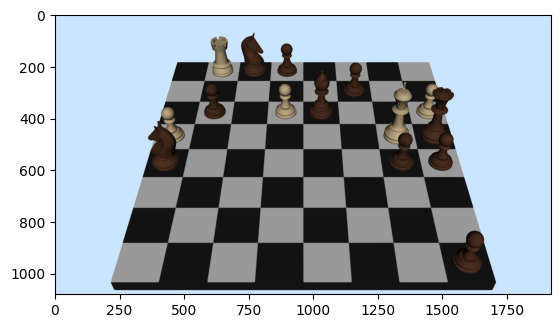

In [5]:
i = 2
per_station.set_arbitrary_board(15)
per_station.read_rgbd_sensor()
images = per_station.station.GetOutputPort('camera_masked_depth_image').Eval(per_station.station_context)

image = images[i]
print(image.shape)
image = Image.fromarray(np.uint8(image)).convert('RGB')
plt.imshow(image)